# Comparison of DQL Networks
<strong>Michael Ruggiero<br>
Tuesday, August 6th, 2019<br>
michael@mcruggiero.com

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-Imports" data-toc-modified-id="Basic-Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic Imports</a></span></li></ul></div>

## Basic Imports

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

from time import time
import gym
import math

from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

Episode finished after 20 steps
Episode finished after 17 steps
Episode finished after 18 steps
Episode finished after 14 steps
Episode finished after 12 steps
Episode finished after 27 steps
Episode finished after 10 steps
Episode finished after 10 steps
Episode finished after 12 steps
Episode finished after 11 steps
Episode finished after 18 steps
Episode finished after 34 steps
Episode finished after 15 steps
Episode finished after 17 steps
Episode finished after 31 steps
Episode finished after 32 steps
Episode finished after 29 steps
Episode finished after 13 steps
Episode finished after 9 steps
Episode finished after 63 steps
Episode finished after 23 steps
Episode finished after 11 steps
Episode finished after 15 steps
Episode finished after 13 steps
Episode finished after 21 steps
Episode finished after 24 steps
Episode finished after 52 steps
Episode finished after 27 steps
Episode finished after 21 steps
Episode finished after 38 steps
Episode finished after 14 steps
Episode f

Episode finished after 34 steps
Episode finished after 23 steps
Episode finished after 15 steps
Episode finished after 11 steps
Episode finished after 31 steps
Episode finished after 24 steps
Episode finished after 15 steps
Episode finished after 26 steps
Episode finished after 14 steps
Episode finished after 24 steps
Episode finished after 12 steps
Episode finished after 20 steps
Episode finished after 13 steps
Episode finished after 11 steps
Episode finished after 8 steps
Episode finished after 20 steps
Episode finished after 22 steps
Episode finished after 22 steps
Episode finished after 15 steps
Episode finished after 14 steps
Episode finished after 14 steps
Episode finished after 41 steps
Episode finished after 8 steps
Episode finished after 9 steps
Episode finished after 11 steps
Episode finished after 14 steps
Episode finished after 16 steps
Episode finished after 13 steps
Episode finished after 24 steps
Episode finished after 18 steps
Episode finished after 20 steps
Episode fin

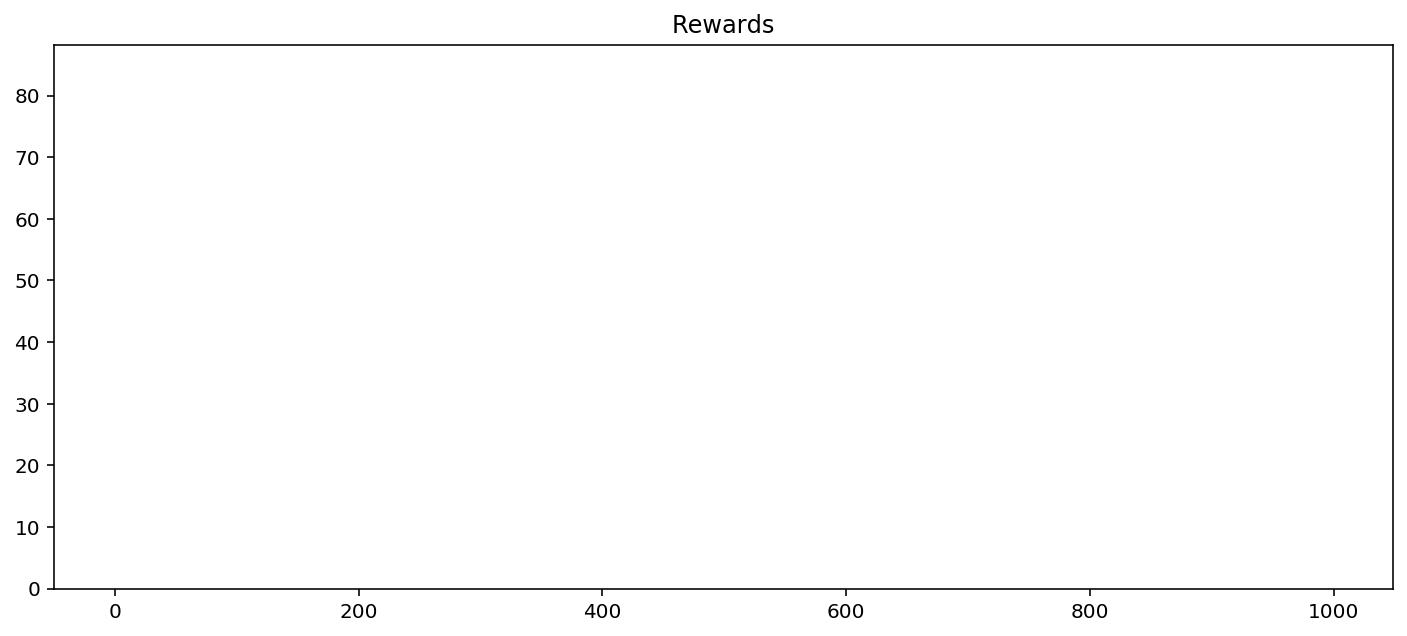

In [11]:
env = gym.make('CartPole-v0')

seed_value = 23
env.seed(seed_value)
torch.manual_seed(seed_value)
random.seed(seed_value)

num_episodes = 1000

steps_total = []

for i_episode in range(num_episodes):
    
    state = env.reset()
    
    step = 0
    #for step in range(100):
    while True:
        
        step += 1
        
        action = env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)
        
        #print(new_state)
        #print(info)
        
        #env.render()
        
        if done:
            steps_total.append(step)
            print("Episode finished after %i steps" % step )
            break
        

print("Average reward: %.2f" % (sum(steps_total)/num_episodes))
print("Average reward (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='green')
plt.show()

env.close()
env.env.close()

fig size: 72.0 DPI, size in inches [6. 4.]
timestep 0


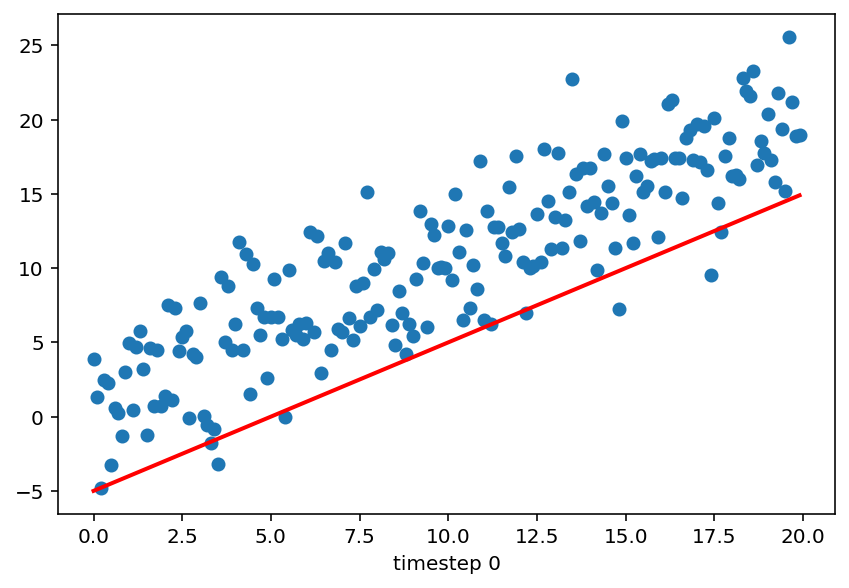

In [12]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
    if len(sys.argv) > 1 and sys.argv[1] == 'save':
        anim.save('line.gif', dpi=80, writer='imagemagick')
    else:
        # plt.show() will just loop the animation forever.
        plt.show()

In [13]:
update(10)

timestep 10


(<matplotlib.lines.Line2D at 0x7f22e7dc48d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f22e8be7da0>)

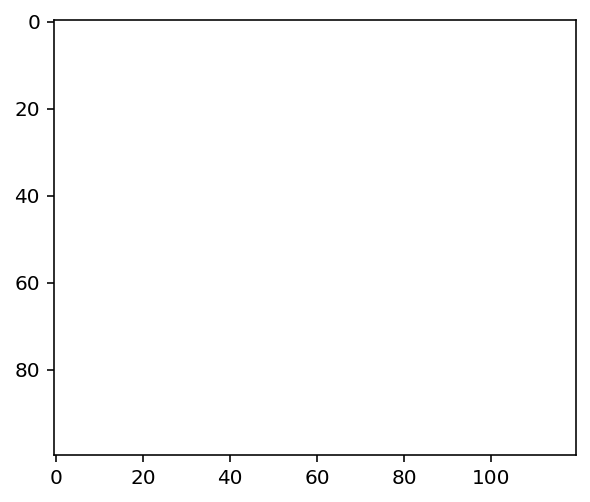

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# ani.save('dynamic_images.mp4')

plt.show()

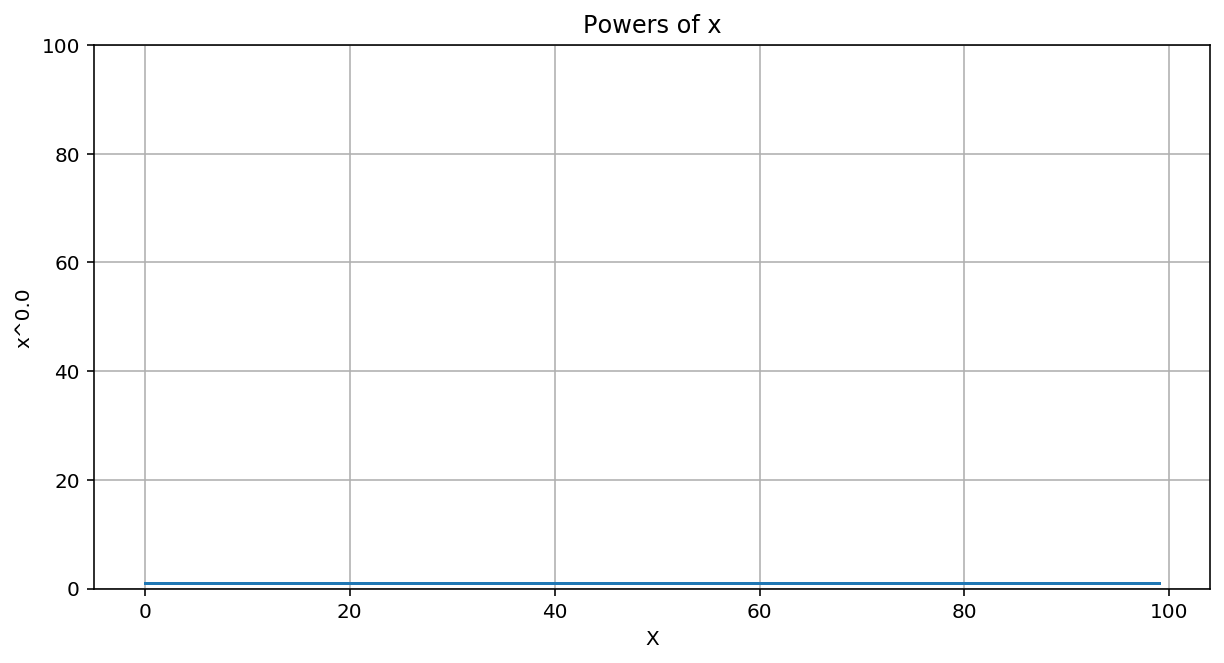

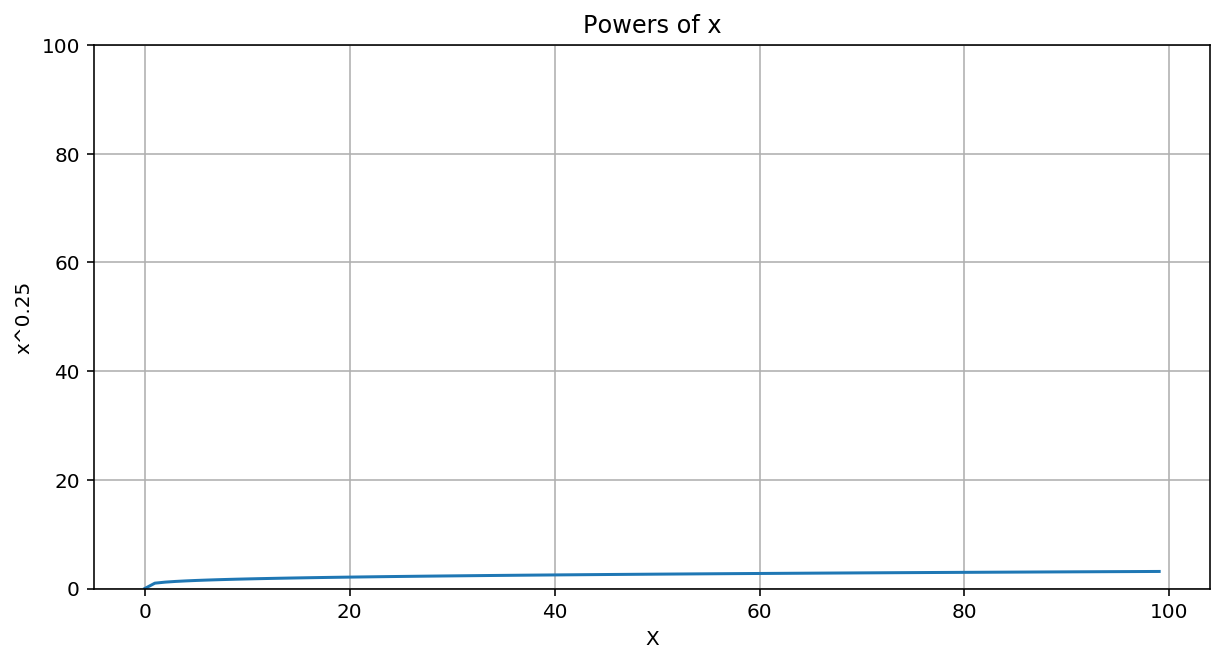

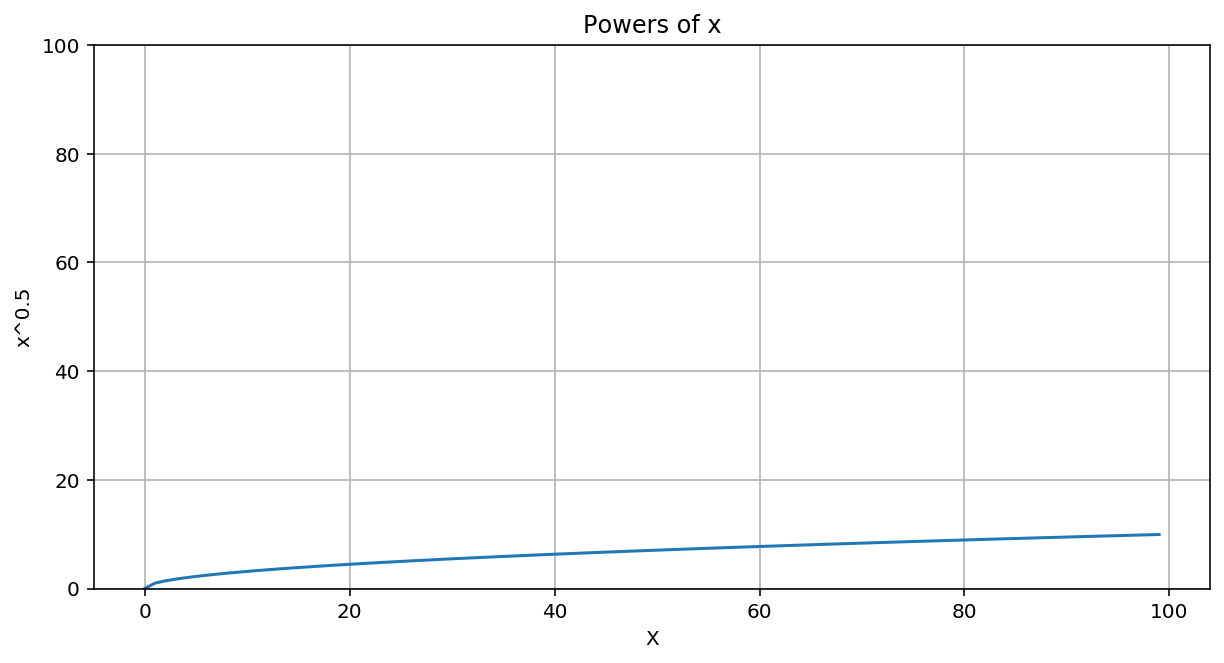

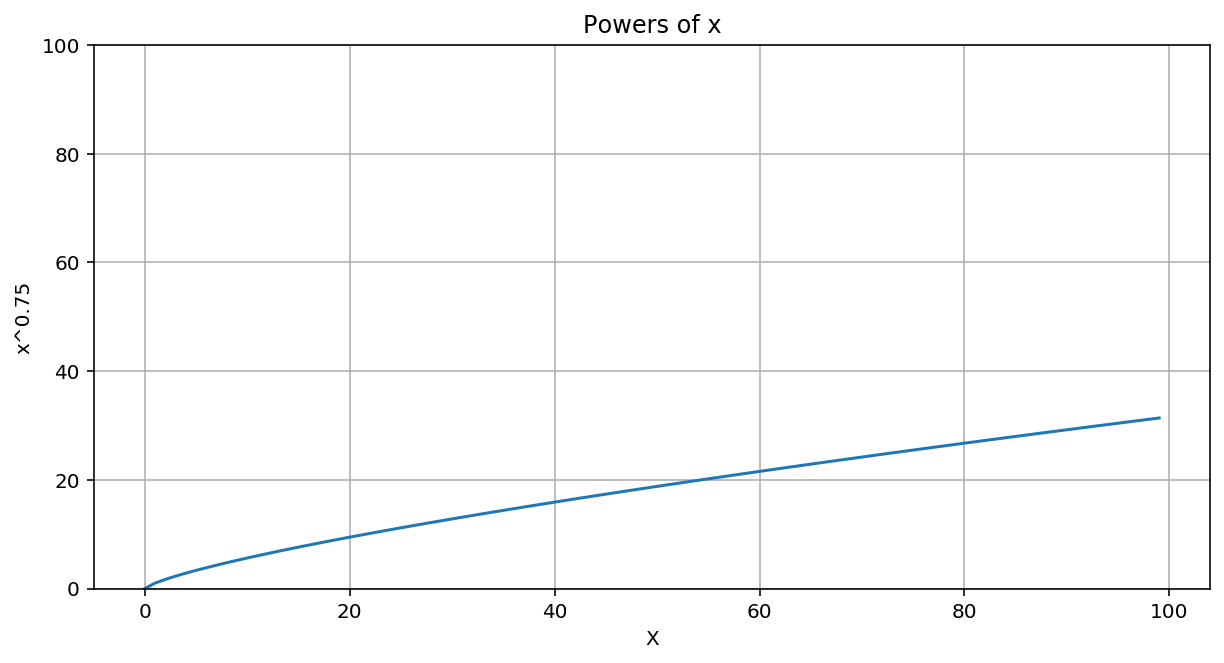

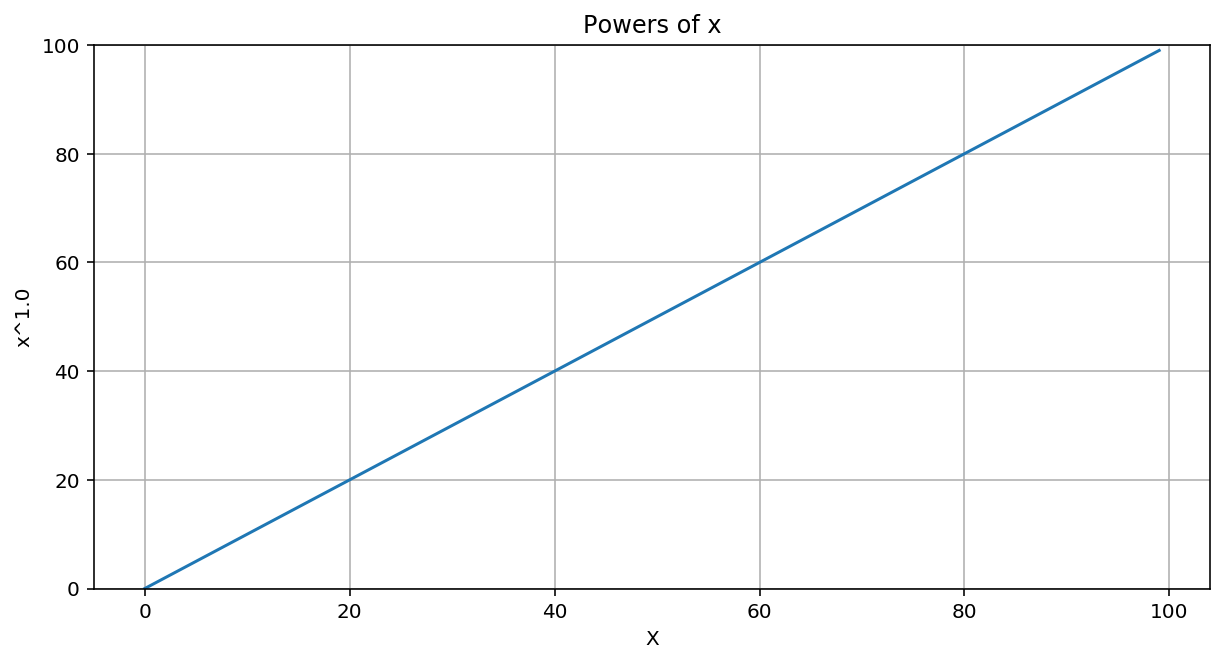

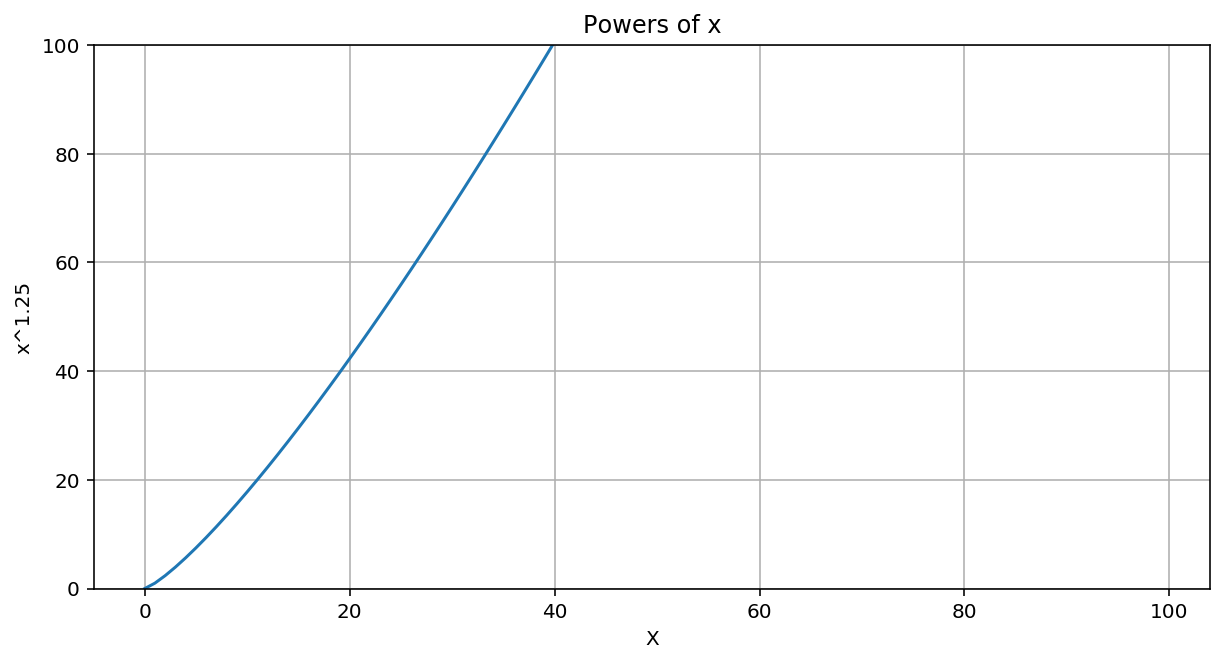

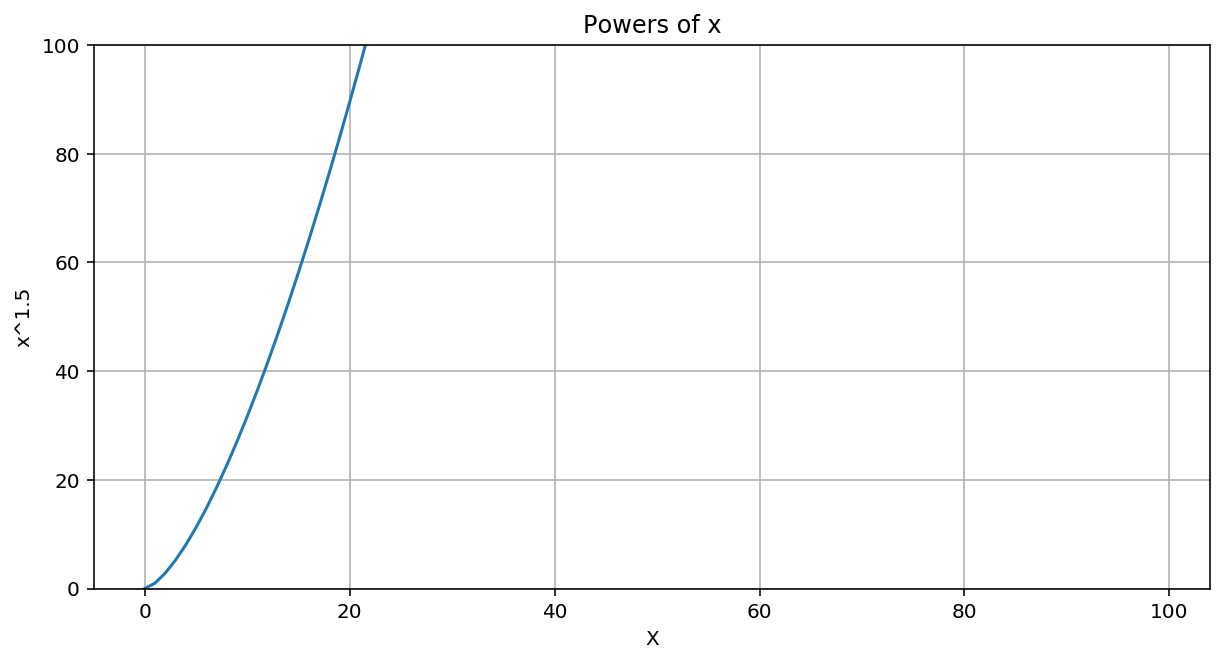

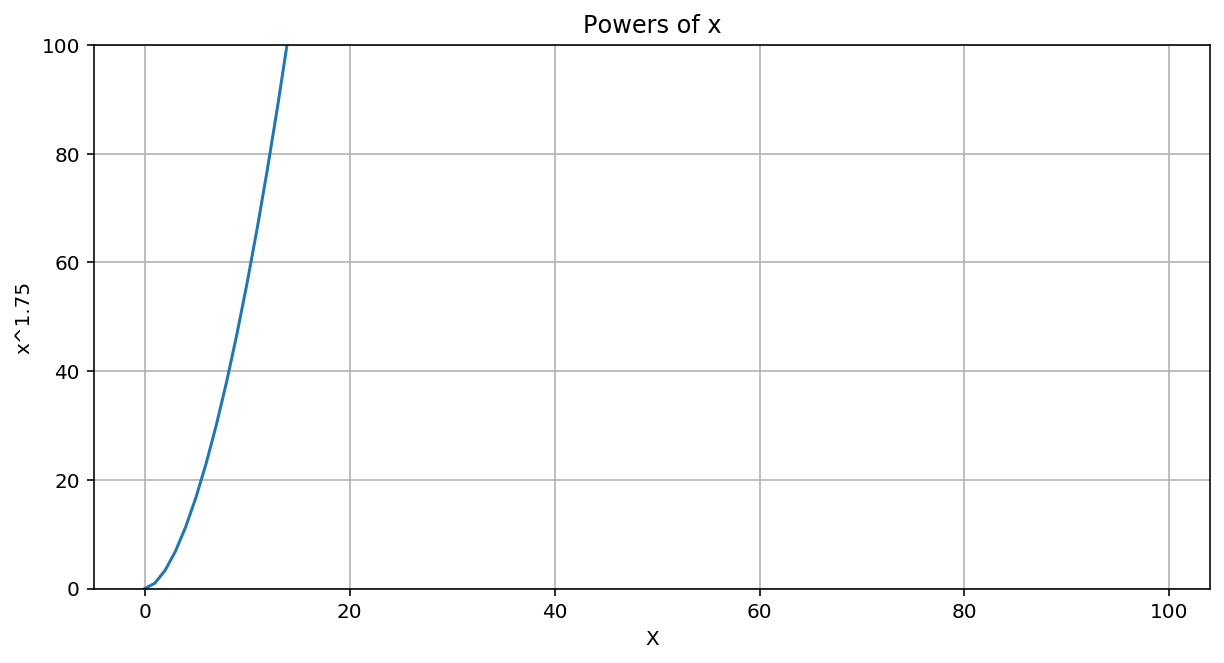

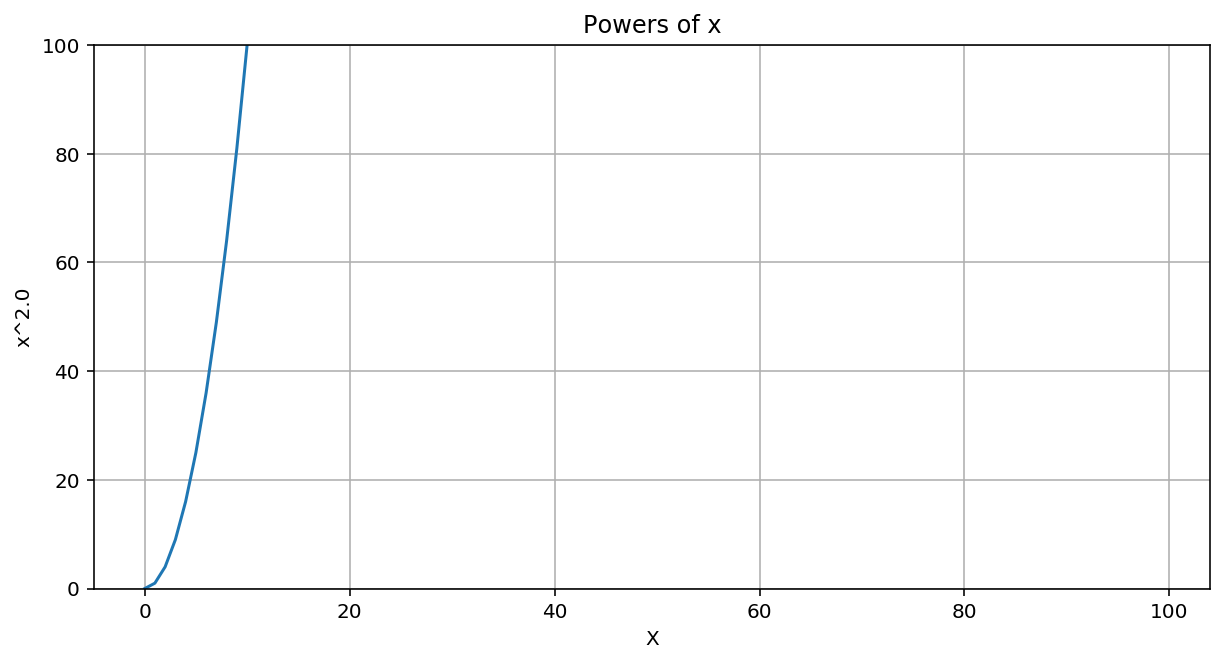

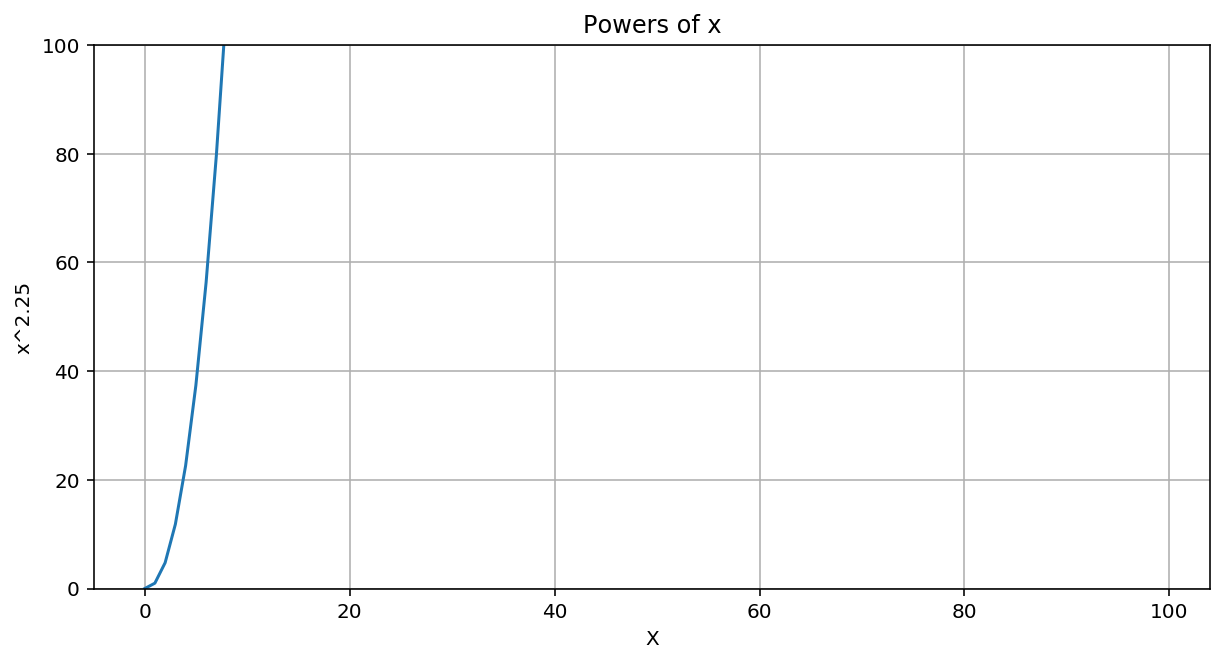

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio

def plot_for_offset(power, y_max):
    # Data for plotting
    t = np.arange(0.0, 100, 1)
    s = t**power

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(t, s)
    ax.grid()
    ax.set(xlabel='X', ylabel='x^{}'.format(power),
           title='Powers of x')

    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant
    ax.set_ylim(0, y_max)

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./powers.gif', [plot_for_offset(i/4, 100) for i in range(10)], fps=1)